<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE-DATA-SCIENCE/blob/PROJECT-4/Email_Spam_Detection_With_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries for text preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Rename the columns
df.columns = ['label', 'message']

In [16]:
df.shape

(5169, 2)

In [17]:
#Drop duplicated values
df=df.drop_duplicates()
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df.shape

(5169, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [20]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [21]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

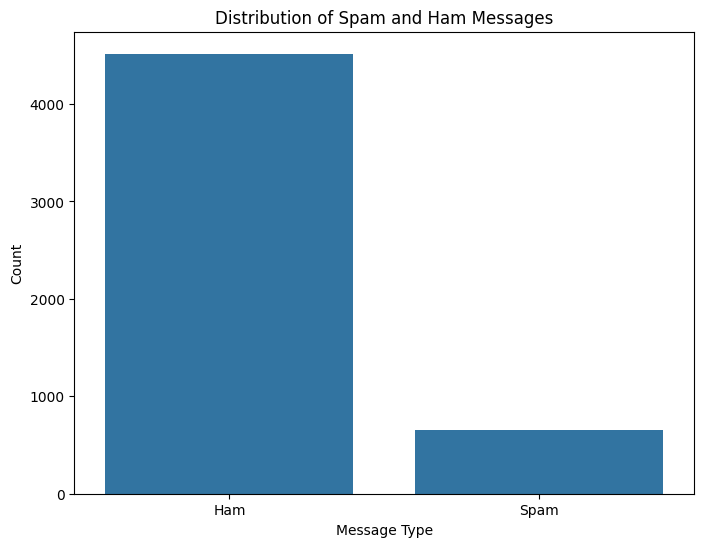

In [22]:
# Create a bar plot to visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

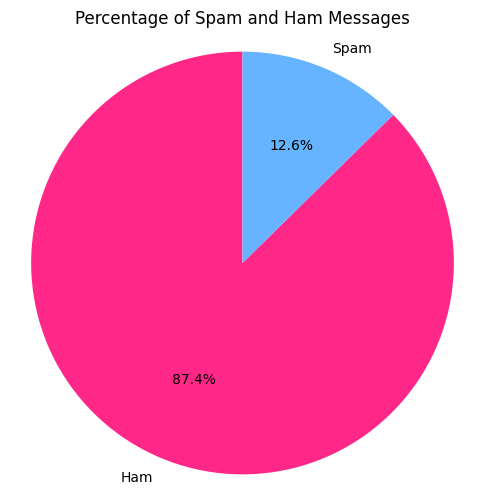

In [23]:
# Count the number of spam and ham messages
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
# Define a function to preprocess text data
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [26]:
# Create a copy of the DataFrame and modify it
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['message'] = df_1['message'].apply(lambda x: preprocess_text(x))

In [27]:
df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [29]:
# Split the data into features (X) and labels (y)
X = df_1['message']
y = df_1['label']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# TF-IDF Vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [32]:
# Multinomial Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [33]:
# Preprocess the test data and make predictions
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [35]:
accuracy*100

97.09864603481626

In [36]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[889   0]
 [ 30 115]]


In [37]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [38]:
# Define the input text
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Ham


In [39]:
# Define the input text
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Spam
